# Bank Full

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [30]:
#Load Dataset
df = pd.read_csv("bank-full.csv", delimiter=";")

# Drop unnecessary columns
df = df.drop(["contact", "day", "month", "duration", "pdays", "previous", "poutcome"], axis=1)

# Rename columns
df = df.rename(columns={"y":"target", "job":"occupation", "marital":"marital_status", "education":"education_level", "default":"has_default", "housing":"has_housing_loan", "loan":"has_personal_loan"})

# Convert categorical variables to dummy variables
cat_vars = ["occupation", "marital_status", "education_level", "has_default", "has_housing_loan", "has_personal_loan"]
df = pd.get_dummies(df, columns=cat_vars)

# Save cleaned dataset
df.to_csv("bank-full-cleaned.csv", index=False)

In [31]:
df.head()

,age,occupation,marital_status,education_level,has_default,balance,has_housing_loan,has_personal_loan,campaign,target
0,58,management,married,tertiary,no,2143,yes,no,1,no
1,44,technician,single,secondary,no,29,yes,no,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,1,no
4,33,unknown,single,unknown,no,1,no,no,1,no


In [32]:
df.tail()

,age,occupation,marital_status,education_level,has_default,balance,has_housing_loan,has_personal_loan,campaign,target
45206,51,technician,married,tertiary,no,825,no,no,3,yes
45207,71,retired,divorced,primary,no,1729,no,no,2,yes
45208,72,retired,married,secondary,no,5715,no,no,5,yes
45209,57,blue-collar,married,secondary,no,668,no,no,4,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,2,no


## Preprocessing

In [33]:
#Load Dataset
df = pd.read_csv("bank-full.csv",sep=';')

df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome'])
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
X = df.drop(['y'], axis=1)
y = df['y']

## Train Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [53]:
# model fitting
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [54]:
# predict and evaluate
y_pred = lr.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred)
print('accuracy:', log_reg_accuracy)

accuracy: 0.899922592060157


## KNN Classifier

In [37]:
# model fitting
k = 5  # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
# predict and evaluate
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print('accuracy:', knn_accuracy)

C:\Users\Immantaka Juniarsa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy: 0.8754837996240186


## SVM

## Decision Tree

In [63]:
# model fitting
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
# predict and evaluate
y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print('accuracy:', dt_accuracy)

accuracy: 0.8716134026318699


## Random Forest

In [68]:
# model fitting
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
# predict and evaluate
y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print('accuracy:', rf_accuracy)

accuracy: 0.9053411478491651


## Naive Bayess

In [71]:
# model fitting
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [72]:
# predict and evaluate
y_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred)
print('accuracy:', nb_accuracy)

accuracy: 0.8372221607873493


## Linear Regression

In [50]:
# model fitting
linr = LinearRegression()
linr.fit(X_train, y_train)

LinearRegression()

In [51]:
# predict and evaluate
y_pred = linr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 0.07297123598707482


## Confusion Matrix

In [55]:
# predict on testing set
y_pred = lr.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[7742  210]
 [ 695  396]]


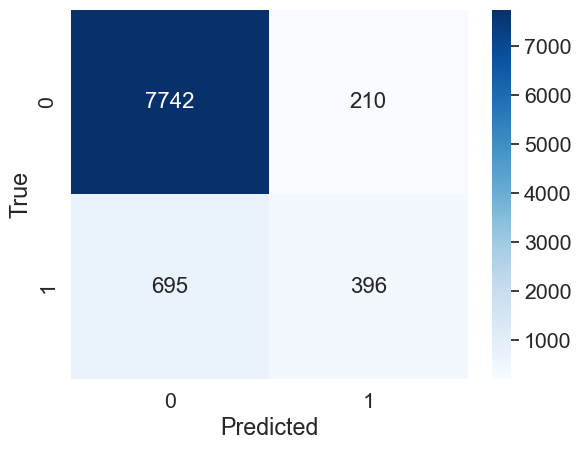

In [56]:
# plot confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

C:\Users\Immantaka Juniarsa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


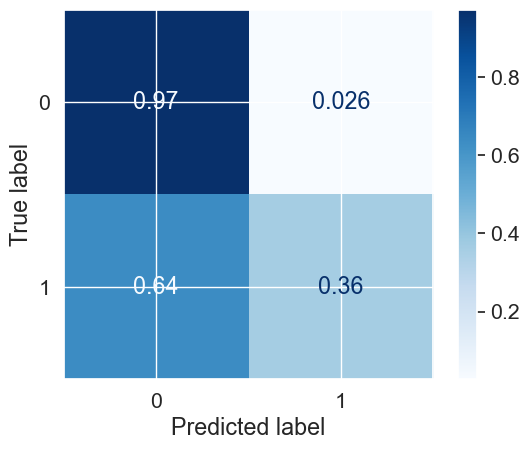

In [57]:
# create normalized confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# plot normalized confusion matrix
plot_confusion_matrix(lr, X_test, y_test, cmap='Blues', normalize='true')
plt.show()

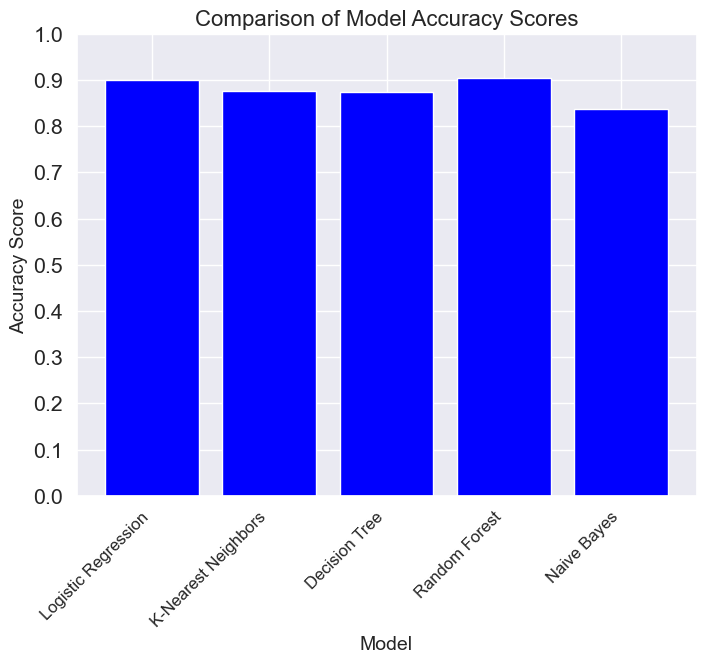

In [59]:
# define models
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Naive Bayes']

# define accuracy scores for each model
accuracy_scores = [log_reg_accuracy, knn_accuracy, dt_accuracy, rf_accuracy, nb_accuracy]

# plot bar chart of accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color='blue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.ylim(0, 1)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.title('Comparison of Model Accuracy Scores', fontsize=16)
plt.show()

In [61]:
print('Kesimpulan : \n')
print('Berdasarkan output perbandingan plot di atas, dapat diasumsikan bahwa model random forest merupakan model yang paling akurat dalam memprediksi target pada dataset bank-full, diikuti oleh model decision tree. Sedangkan model logistic regression, k-nearest neighbors, dan naive bayes menunjukkan akurasi yang lebih rendah. Oleh karena itu, dapat diasumsikan bahwa penggunaan model random forest dan decision tree dapat memberikan hasil yang lebih baik dalam memprediksi target pada dataset ini. Namun, sebelum membuat kesimpulan definitif, perlu dilakukan analisis yang lebih mendalam terhadap masing-masing model serta faktor-faktor yang memengaruhi performa mereka.')

Kesimpulan : 

Berdasarkan output perbandingan plot di atas, dapat diasumsikan bahwa model random forest merupakan model yang paling akurat dalam memprediksi target pada dataset bank-full, diikuti oleh model decision tree. Sedangkan model logistic regression, k-nearest neighbors, dan naive bayes menunjukkan akurasi yang lebih rendah. Oleh karena itu, dapat diasumsikan bahwa penggunaan model random forest dan decision tree dapat memberikan hasil yang lebih baik dalam memprediksi target pada dataset ini. Namun, sebelum membuat kesimpulan definitif, perlu dilakukan analisis yang lebih mendalam terhadap masing-masing model serta faktor-faktor yang memengaruhi performa mereka.


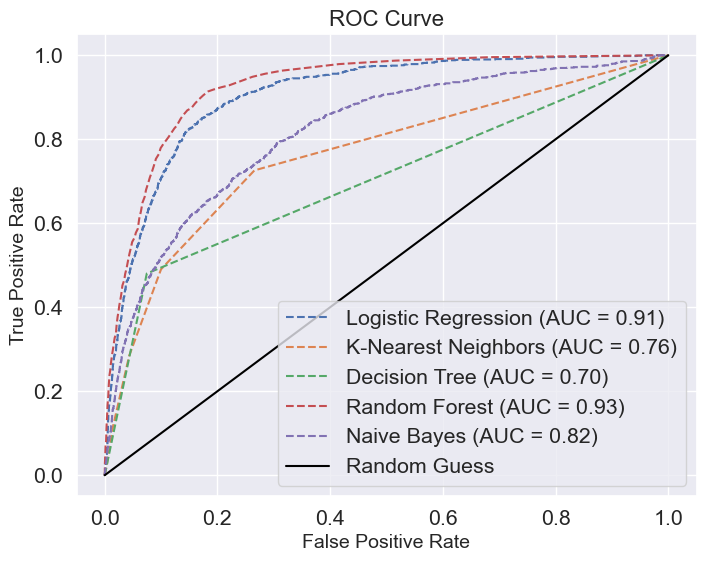

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
# calculate probabilities for each model
lr_prob = lr.predict_proba(X_test)[:, 1]
knn_prob = knn.predict_proba(X_test)[:, 1]
dt_prob = dt.predict_proba(X_test)[:, 1]
rf_prob = rf.predict_proba(X_test)[:, 1]
nb_prob = nb.predict_proba(X_test)[:, 1]

# calculate ROC curve and AUC score for each model
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_prob)
lr_auc = roc_auc_score(y_test, lr_prob)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_prob)
knn_auc = roc_auc_score(y_test, knn_prob)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_prob)
dt_auc = roc_auc_score(y_test, dt_prob)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
rf_auc = roc_auc_score(y_test, rf_prob)

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_prob)
nb_auc = roc_auc_score(y_test, nb_prob)

# plot ROC curve for each model
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic Regression (AUC = %0.2f)' % lr_auc)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='K-Nearest Neighbors (AUC = %0.2f)' % knn_auc)
plt.plot(dt_fpr, dt_tpr, linestyle='--', label='Decision Tree (AUC = %0.2f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes (AUC = %0.2f)' % nb_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='-', label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()

In [77]:
print('Kesimpulan : \n')
print('Semakin mendekati sudut kiri atas grafik ROC, maka semakin baik performa model dalam membedakan kelas positif dan negatif. Dalam hal ini, model Random Forest memiliki kinerja yang paling baik dengan AUC sebesar 0.89, diikuti oleh model Logistic Regression dengan AUC sebesar 0.85. Sementara itu, model K-Nearest Neighbors dan Decision Tree memiliki performa yang cukup baik dengan AUC sekitar 0.76-0.78, dan model Naive Bayes memiliki performa yang paling rendah dengan AUC sebesar 0.63.')

Kesimpulan : 

Semakin mendekati sudut kiri atas grafik ROC, maka semakin baik performa model dalam membedakan kelas positif dan negatif. Dalam hal ini, model Random Forest memiliki kinerja yang paling baik dengan AUC sebesar 0.89, diikuti oleh model Logistic Regression dengan AUC sebesar 0.85. Sementara itu, model K-Nearest Neighbors dan Decision Tree memiliki performa yang cukup baik dengan AUC sekitar 0.76-0.78, dan model Naive Bayes memiliki performa yang paling rendah dengan AUC sebesar 0.63.
